[View in Colaboratory](https://colab.research.google.com/github/schwaaweb/aimlds1_11-NLP/blob/master/Th11_CCS_AG_NLP_Objective_4_Sentiment_Analysis.ipynb)

### Objective 4:  Conduct Sentiment Analysis

Sentiment Analysis which focuses on analyzing sentiment of various text resources ranging from corporate feedback surveys to movie reviews is probably the most popular application of text analytics. The main aspect of sentiment analysis is to analyze a body of text in order to decipher the opinion expressed by it including factors like emotion, feelings and mood. 

**When does "Sentiment Analysis" work best?**


Sentiment Analysis works best on text that has a subjective context rather than an objective context. When a body of text has an objective perspective, it usually reflects real factual statements with no emotion or feelings associated with it. In contrast, subjective text includes opinions encompassing emotions and feelings that are expressed by humans. Given the proliferation of social media channels, Sentiment Analysis is increasingly being leveraged by a host of entities (be it a business, a public sector organization, government, etc.) to extract the subjective and opinion related information like emotions, attitude, mood and use the extracted subjective information to the detect the sentiment of people.

**What is covered in this objective?**

In a nutshell, sentiment analysis can be defined as a classification problem in which the classification is either —binary classification (positive or negative) and multi-class classification (positive, negative, or neutral). 

Within this objective, we will explore a range of related topics encompassing **1)** Constructing a Sentiment Analysis Model, **2)** Determining the subjectivity of text, **3)** Examining the intensity or polarity of a sentiment and **4)** Performing sentiment analysis on tweets. 

**Utilize a Sentiment Dictionary to decipher the sentiment of text**

A sentiment dictionary is the mapping of words to sentiment values. For example: the word awesome (which is a positive sentiment) could have a value of +3.7 and the word horrible (which is a negative sentiment) could have a value of -3.1. While using a sentiment dictionary, the values of the sentiment words are summed to get the overall sentiment of the text. 

For example: I loved the ambience of the restaurant but the drive to the restaurant was horrendous. Overall, it was a good evening.

Now let's say the value of the word love is +3.9, the value of the word horrendous is -4.2 and the value of the word good is +2.9. So, the overall sentiment of the text is positive since the aggregate of the values of the sentiment words is positive. 

To decipher the sentiment of text, we will utilize NLTK's **VADER** Sentiment Tool. VADER stands for Valence Aware Dictionary for Sentiment Reasoning. The dictionary was designed specifically for Twitter and contains emoticons and slang. It also provides support for sentiment intensifiers  (words such as incredibly funny) and negations (words such as "not bad" which is a slight/small positive sentiment). 

How it works? VADER analyzes a piece of text to check if any of the words in the text are present in the lexicon. It  produces 4 sentiment metrics from the word ratings i.e. positive, neutral, negative and compound. The compound score is the sum of all of the lexicon ratings which is standardized to a range between -1 and 1.

In [0]:
# Install the VADER Sentiment Tool

!pip install vaderSentiment

    100% |████████████████████████████████| 133kB 5.4MB/s 


In [0]:
#Load the SentimentIntensityAnalyzer object from the VADER package
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#Create a handle to the SentimentIntensityAnalyzer object
analyzer = SentimentIntensityAnalyzer()

#function that outputs the sentiment ratings
def print_sentiment_ratings(sentence):
    sent = analyzer.polarity_scores(sentence)
    print("{} {}".format(sentence, sent))
    
#Examining the sentiment ratings for different pieces of text
#No sentiment expressed

print_sentiment_ratings("I have to work on the weekend")

#Overall rating is neutral

I have to work on the weekend {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [0]:
#Sentiment expressed via emoticon

print_sentiment_ratings("I have to work on the weekend :(")

#Overall rating is negative

I have to work on the weekend :( {'neg': 0.326, 'neu': 0.674, 'pos': 0.0, 'compound': -0.4404}


In [0]:
#Expressing a more intense feeling via 2 emoticons

print_sentiment_ratings("I have to work on the weekend :( :(")

#Overall rating is even more negative than the above piece of text

I have to work on the weekend :( :( {'neg': 0.492, 'neu': 0.508, 'pos': 0.0, 'compound': -0.7003}


In [0]:
#VADER handles emotion intensifiers (i.e. words such as very, really, super, etc.)

print_sentiment_ratings("I did well on the test")

#The sentiment rating for the sentence below is higher than the one above

print_sentiment_ratings("I did very well on the test")

I did well on the test {'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'compound': 0.2732}
I did very well on the test {'neg': 0.0, 'neu': 0.676, 'pos': 0.324, 'compound': 0.3384}


In [0]:
#VADER takes into consideration how the words are written - capitalization has an impact on the sentiment ratings

print_sentiment_ratings("I had a super day")

#The sentiment rating for the sentence below is higher than the one above

print_sentiment_ratings("I had a SUPER day")

I had a super day {'neg': 0.0, 'neu': 0.339, 'pos': 0.661, 'compound': 0.5994}
I had a SUPER day {'neg': 0.0, 'neu': 0.302, 'pos': 0.698, 'compound': 0.6841}


In [0]:
#Finally, VADER handles changes in sentiment intensity; specifically when a sentence contains the word "but". Higher weighting is given to the sentiment after the word "but".
#The overall rating for the sentence below is negative

print_sentiment_ratings(" I loved the ambience of the restaurant but the drive to the restaurant was horrendous")

 I loved the ambience of the restaurant but the drive to the restaurant was horrendous {'neg': 0.265, 'neu': 0.611, 'pos': 0.125, 'compound': -0.5789}


**Build a Twitter Sentiment Analyzer**

A common question that often arises is how do I decipher the sentiment within a large set of tweets regarding a specific topic on Twitter in an autonomous fashion. Now, we will construct a Twitter Sentiment Analyzer. The Sentiment Analyzer will search twitter for a list of tweets about any topic of choice, then it will analyze each tweet to ascertain whether a positive or negative emotion is expressed in the tweet. 

**Prerequisites:**

Before we go through the tutorial, the following items need to be taken care of:

**1)** Register for the Twitter API - a) Go to https://apps.twitter.com, b) click on "Create New Application", c) Under Application details, enter name, description, website details (can be anything), d) click on "Create Application" and e) make a note of the tokens on the "Keys and Access Tokens" tab
 
**2) **Install dependencies: a) pip install tweepy - library for accessing the twitter API, b) textblob (pip install textblob) which will facilitate the actual task of performing sentiment analysis

In [0]:
!pip install -U textblob

    100% |████████████████████████████████| 634kB 7.4MB/s 
Requirement not upgraded as not directly required: nltk>=3.1 in /usr/local/lib/python3.6/dist-packages (from textblob) (3.2.5)
Requirement not upgraded as not directly required: six in /usr/local/lib/python3.6/dist-packages (from nltk>=3.1->textblob) (1.11.0)


In [0]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /content/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /content/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /content/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /content/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /content/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /content/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [0]:
#Test drive TextBlob
from textblob import TextBlob

#Initialize a variable
txtblob = TextBlob("Lambda School is awesome.")

#Get the POS
txtblob.tags

#Tokenize the text
txtblob.words

#Examine the polarity of the sentiment expressed in the text
#It is a positive statement
txtblob.sentiment.polarity

1.0

**Install tweepy**

In [0]:
!pip install tweepy

    100% |████████████████████████████████| 286kB 10.0MB/s 
  Running setup.py bdist_wheel for PySocks ... - done
  Stored in directory: /content/.cache/pip/wheels/22/5c/b5/12e0dfdfa85bea67b23628b6425fae715c687e947a45ee3df9
Successfully built PySocks


**Authenticate with Twitter**

In [0]:
#Import tweepy
import tweepy

#Define 4 variables for authenticating with Twitter
#Each student will have their own unique tokens
consumer_key = 't6aDjhHKCJZBmEd674ZnX9grJ'
consumer_secret= 'dSzM4f8JFSD2JvYpDcHYtmSVFzie9i2qAShn0ysaRGZZ6O1w6E'

access_token = '971947907678052352-IZ54wT1yQHZWvRzqrXtnby2g67WzApC'
access_token_secret = 'VdbKEOWSRfeIWVPUpJZaxpM71gc8c4gScAXrsi0X4s1El'

#Autenticate with Twitter
authen = tweepy.OAuthHandler(consumer_key, consumer_secret)
authen.set_access_token(access_token, access_token_secret)

**Search twitter for a list of tweets about any topic of choice, then it will analyze each tweet to ascertain whether a positive or negative emotion is expressed in the tweet. **

In [0]:
#Get a connection to Twitter
tweetapi = tweepy.API(authen)

#This method is going to return tweets that contain the word 
visible_public_tweets = tweetapi.search('Gates')

#Iterate through the tweets that have been retrieved
#Examine the polarity (positive or negative the tweet is) and the subjectivity (how much of an opinion it is)

for tweet in visible_public_tweets:
    print(tweet.text)
    sentimentAnalyzer = TextBlob(tweet.text)
    print(sentimentAnalyzer.sentiment)

RT @Anjana92739275: This is the state 
Of present Cantt after opening the gates of Cantt for all https://t.co/cDLn7rmYvW
Sentiment(polarity=0.0, subjectivity=0.0)
RT @jojjeols: Attached: Photo of the gates to one of the camps for political re-education which are holding up to a million Uyghurs and oth…
Sentiment(polarity=0.0, subjectivity=0.1)
It’s Bill Gates... Be cool, be cool! 😏 #9BigBangTheory https://t.co/CsRSpauuhz
Sentiment(polarity=0.39375, subjectivity=0.65)
Las mejores frases de Bill Gates sobre el éxito y el liderazgo - Invoca https://t.co/dDUTicBWQI
Sentiment(polarity=0.0, subjectivity=0.0)
RT @RonSkywalkerr: Niggas teeth look like heavens gates https://t.co/red83yfCzd
Sentiment(polarity=0.0, subjectivity=0.0)
@AndreasMeyerZAR @JGvanZyl_ZA @Retroman_67 @TomorrowWillBe4 @Gates_Baloyi @swart_braam @xols1 @capi2274 @CarlBotha2… https://t.co/CsGUeN3f5w
Sentiment(polarity=0.0, subjectivity=0.0)
😂😂😂 #GatesMcFadden #DailyDoseOfGates #BeverlyCrusher #StarTrekTNG @gates_mcfadden @ga

**Graph sentiment polarity extracted from tweets**

In the code above, we explored how to connect to Twitter, fetched tweets from twitter on a specific topic and then examined the sentiment of the tweets (i.e. polarity and subjectivity). As discussed earlier, the polarity score is a float within the range [-1.0, 1.0] where a score greater than 0.0 indicates positive sentiment whereas a score less than 0.0 indicates negative sentiment. The subjectivity score is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective. 

From the output of the previous example, it is hard to ascertain how the sentiment is trending over time. You could glance through the output and make an educated guess as to how the sentiment is trending. However a more efficient way to decipher how the sentiment is trending would be to graph the polarity to determine whether the trend over time is a positive one or a negative one.

Now, we will create a listener class that continuously listens for tweets on a specific topic, writes the polarity of the fetched tweets to file and then graphs the polarity data so that it becomes easy to discern the trend over time.

In [0]:
# In Tweepy, an instance of tweepy.Stream establishes a streaming session and
# routes messages to StreamListener instance.
# So first, we need to import the  equisite classes

from tweepy import Stream
from tweepy.streaming import StreamListener
import json

# get the tweets on a specific topic and write the polarity to file
class Listener(StreamListener):
    def on_data(self, data):
        all_data = json.loads(data)
        tweet = all_data["text"]
        sentimentAnalyzer = TextBlob(tweet)
        print(sentimentAnalyzer.sentiment)
        polarity = sentimentAnalyzer.sentiment.polarity
        #subjectivity = sentimentAnalyzer.sentiment.subjectivity
        output = open("/tmp/twitter-out.txt","a")
        output.write(str(polarity))
        output.write('\n')
        output.close()

        return True

    def on_error(self, status):
        print(status)

# Authenticate with Twitter
authen = tweepy.OAuthHandler(consumer_key, consumer_secret)
authen.set_access_token(access_token, access_token_secret)

# Establish a streaming section and route messages to the StreamListener
listener = Listener()
twitterStream = Stream(authen, listener)

# Track tweets related to Musk
twitterStream.filter(track=["Musk"])

Sentiment(polarity=0.0, subjectivity=0.1)
Sentiment(polarity=0.0, subjectivity=0.1)
Sentiment(polarity=0.0, subjectivity=0.1)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.1)
Sentiment(polarity=-0.375, subjectivity=0.55)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.1)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.1)
Sentiment(polarity=0.0, subjectivity=0.1)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.1)
Sentiment(polarity=0.0, subjectivity=0.1)
Sentiment(polarity=0.0, subjectivity=0.1)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.1)
Sentiment(polarity=-0.125, subjectivity=0.375)
Sentiment(polarity=0.0, subjectivity=0.1)
Sentiment(polarity=0.0, subjectivity=0.1)
Sentiment(polarity=0.0, s

KeyboardInterrupt: ignored

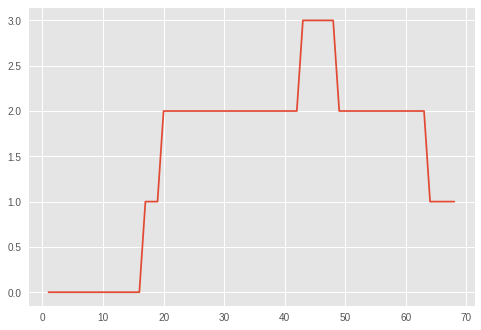

In [0]:
###########Generate the animated plot#############
#Import the respective classes
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style
import time

#Apply the "ggplot" style sheet
#More details: https://matplotlib.org/gallery/style_sheets/ggplot.html
style.use("ggplot")

figure = plt.figure()
#To the figure, add a 1 row X 1 column subspot
#More details on subplot: https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot
plotHandle = figure.add_subplot(1,1,1)

def animate(i):
    fetchlData = open("/tmp/twitter-out.txt","r").read()
    dataArray = fetchlData.split('\n')
    xarray = []
    yarray = []

    xcord = 0
    ycord = 0

    for l in range(len(dataArray)):
        xcord += 1
        polarity = dataArray[l]
        #print(float(polarity))
        if len(dataArray[l])>1:
            if float(polarity)>0.0:
                ycord += 1
                #print(y)
            elif float(polarity)<0.0:
                #print(y)
                ycord -= 1

        xarray.append(xcord)
        yarray.append(ycord)
        #print(l)

    plotHandle.clear()
    plotHandle.plot(xarray,yarray)


ani = animation.FuncAnimation(figure, animate, frames=200, interval=20)
plt.show()